In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


#### 1. Mean

Describes the sum of all observations by total no of observation

$$ z = \frac{sum(x)}{len(x)}$$

where,

x is the array of input

In [3]:
df['Mthly_HH_Income'].mean()

41558.0

In [4]:
def mean(x):
    a = sum(x)
    b = len(x)
    return a/b
mean(df['Mthly_HH_Income'])

41558.0

#### 2. Median

This sorts the data point from ascending to descending and finds the middle number of the list

$$ z = \frac{n +1}{2}$$

n denotes the number of elements in the given array

In [5]:
df['Mthly_HH_Income'].median()

35000.0

In [6]:
def median(sample):
    a = len(sample)
    index = a // 2
    if a % 2:
        return sorted(sample)[index]
    return sum(sorted(sample)[index - 1:index + 1]) / 2
median(df['Mthly_HH_Income'])

35000.0

#### 3. Mode

 Finds the most repeated value in the entire column

$$ z = L + \frac{(f_m - f_1) * h}{(f_m - f_1) + (f_m-f_2)}$$

where,

$L$ = The Lower limit of the modal class

$f_m$ = Frequency of the modal class

$f_1$ = Frequency of the preceding modal class

$f_2$ = Frequency of the next modal class

$h$ = Size of the class interval

In [7]:
df['Mthly_HH_Income'].mode()

0    45000
dtype: int64

In [8]:
from collections import Counter
def mode(sample):
    a = Counter(sample)
    return [b for b, c in a.items() if c == a.most_common(1)[0][1]]
mode(df['Mthly_HH_Income'])

[45000]

#### 4. Variance 

It measures how far the values present in a column are spread out from their average value.

$$ z^2 =  \frac{\Sigma(x_i - \bar{x})^2}{n - 1}$$

where,

$x_i$ = ith element in given array

$\bar{x}$ = mean of the array

$n$ = number of obervations

In [9]:
np.var(df['Mthly_HH_Income'])

667478836.0

In [10]:
def variance(data):
    mean = sum(data) / len(data)
    var = sum((a - mean) ** 2 for a in data) / len(data)
    return var
variance(df['Mthly_HH_Income'])

667478836.0

#### 5. Standard Devialtion

Sqaure root of variance is referred to as Standard deviation

$$ \sigma =  \sqrt\frac{\Sigma(x_i - \bar{x})^2}{n - 1}$$

where, 

$x_i$ = ith element in given array

$\bar{x}$ = mean of the array

$n$ = number of obervations

In [11]:
np.std(df['Mthly_HH_Income'])

25835.611779092826

In [12]:
def stdev(data):
    var = variance(data)
    std = math.sqrt(var)
    return std
stdev(df['Mthly_HH_Income'])

25835.611779092826

#### 6. Correlations

The pearson correlation explains how the points are correlated with each other. The more closer to 1, the more correlation and the more closer to -1, the more negatively correlated.

$$ r =  \frac{\Sigma(x_i - \bar{x})(y_i - \bar{y})}{\sqrt\Sigma(x_i - \bar{x})^2\Sigma(y_i - \bar{y})^2}$$

$x_i$ = ith element in given array X

$\bar{x}$ = mean of the array X

$y_i$ = ith element in given array Y

$\bar{y}$ = mean of the array Y

In [13]:
df['Mthly_HH_Income'].corr(df['Mthly_HH_Expense'])

0.6492152549316462

In [14]:
def pearsonr(x, y):
    n = len(x)
    sum_x = float(sum(x))
    sum_y = float(sum(y))
    sum_x_sq = sum(xi*xi for xi in x)
    sum_y_sq = sum(yi*yi for yi in y)
    psum = sum(xi*yi for xi, yi in zip(x, y))
    num = psum - (sum_x * sum_y/n)
    den = pow((sum_x_sq - pow(sum_x, 2) / n) * (sum_y_sq - pow(sum_y, 2) / n), 0.5)
    if den == 0: return 0
    return num / den

pearsonr(df['Mthly_HH_Income'],df['Mthly_HH_Expense'])

0.6492152549316461

#### 7. Normal Distribution

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.

$$ f(x) =  \frac{1}{\sigma\sqrt2\pi} e ^ {\frac{-(x-\mu)^2}{2\sigma^2}}$$

where,

$x$ = elements of array x

$\mu$ = mean 

$\sigma^2$ = variance

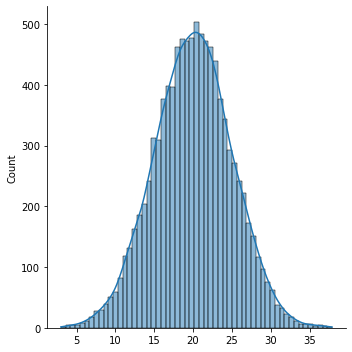

In [15]:
normal = np.random.normal(loc = 20, scale = 5, size=10000)

sns.displot(normal, kde = True)

#### 8. Features of Normal DIstribution

The mean, mode, and median are all equal.


The total area under the curve is equal to 1.


The curve is symmetric around the mean.

Approximately 68% of values in the distribution are within 1 SD of the mean, i.e., above or below.
P (µ - σ < X < µ + σ) = 0.68

Approximately 95% of values in the distribution are within 2 SD of the mean.
P (µ - 2σ < X < µ + 2σ) = 0.95

Approximately 99% of values in the distribution are within 3 SD of the mean.
P (µ - 3σ < X < µ + 3σ) = 0.99

In [16]:
mean2 = normal.mean()
std = normal.std()
print(mean2, std)

19.999568475827438 4.96481270215669


<Figure size 1440x1440 with 0 Axes>

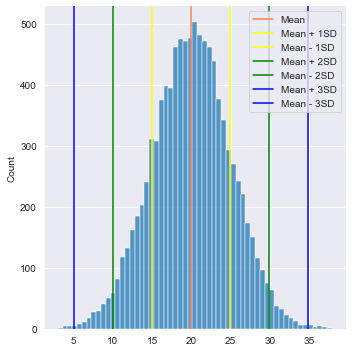

In [17]:
one_std_right = mean2 + (1 * std)
one_std_left = mean2 - (1 * std)
two_std_right = mean2 + (2 * std)
two_std_left = mean2 - (2 * std)
three_std_right = mean2 + (3 * std)
three_std_left = mean2 - (3 * std)

plt.figure(figsize=(20, 20))
sns.set_style("darkgrid")
sns.displot(normal)

plt.axvline(mean2, color='coral', label='Mean')

plt.axvline(one_std_right, color='yellow', label='Mean + 1SD')
plt.axvline(one_std_left, color='yellow', label='Mean - 1SD')
plt.axvline(two_std_right, color='green', label='Mean + 2SD')
plt.axvline(two_std_left, color='green', label='Mean - 2SD')
plt.axvline(three_std_right, color='blue', label='Mean + 3SD')
plt.axvline(three_std_left, color='blue', label='Mean - 3SD')
plt.legend();

#### 9. Positevely Skewed normal distribution

Right-skewed distributions are also called positive-skew distributions. That's because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak. The normal distribution is the most common distribution you'll come across. The below shown data have positive skewness

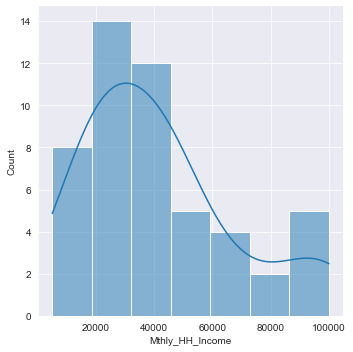

In [18]:
sns.displot(df['Mthly_HH_Income'], kde = True)

We can check weather the given plot is normally seperated or not by using a q-q plot as shown in the below image. If the blue points lie on the red line then the data is normally distribute. Or else, its not

effect of mean, median, mode due to skewness

In [19]:
df['Mthly_HH_Income'].mean()

41558.0

In [20]:
mode(df['Mthly_HH_Income'])

[45000]

In [21]:
median(df['Mthly_HH_Income'])

35000.0

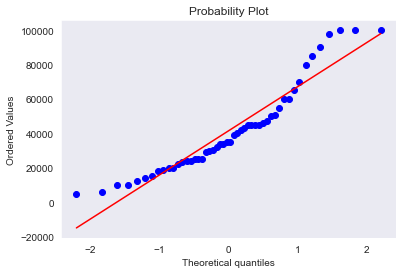

In [22]:
stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

Now, we can convert this positively skewed data to a nomral distribution with help of boxcoc

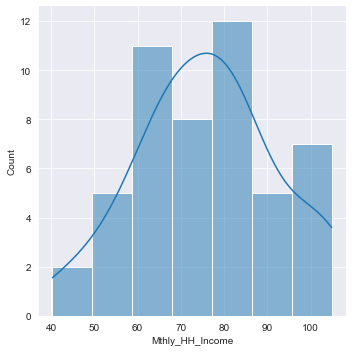

In [23]:
df['Mthly_HH_Income'] = stats.boxcox(df['Mthly_HH_Income'])[0]
sns.displot(df['Mthly_HH_Income'], kde = True)

If we observe this, we can see that our data is normally distributed and we can even check this with help of q-q plot

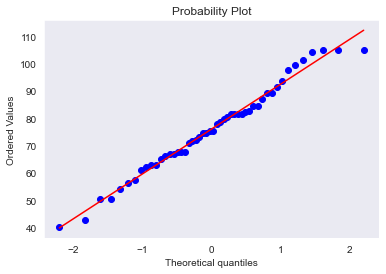

In [24]:
stats.probplot(df['Mthly_HH_Income'], dist="norm", plot=plt)

plt.grid()

The distribution of data looks much better as compared to that of the previous model.

Lets check the effect of mean, median and mode on skewness

In [25]:
df['Mthly_HH_Income'].mean()

76.08387276753646

In [26]:
mode(df['Mthly_HH_Income'])

[81.60438084402554]

In [27]:
median(df['Mthly_HH_Income'])

75.3764528594088

we see that the values of mean, median and mode are totally effected by the tranforming the data from skewed data to unskewed data

#### 10. Negatively Skewed normal distribution

Left-skewed distributions are also called negative-skew distributions. That's because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak. The below shown data have negative skewness

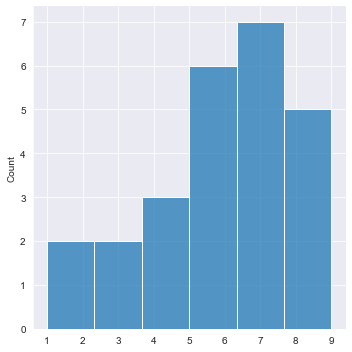

In [28]:
x = [1,2,3,3,4,4,4,5,5,5,5,5,6,7,7,7,7,7,7,7,8,8,8,8, 9]
sns.displot(x)

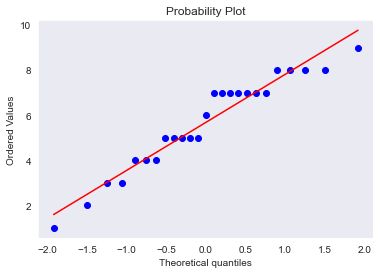

In [29]:
stats.probplot(x, dist="norm", plot=plt)

plt.grid()

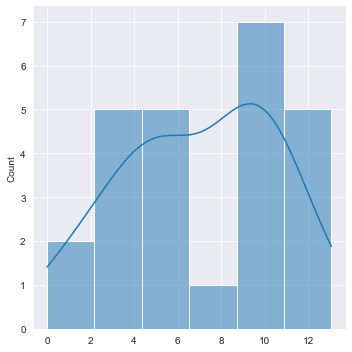

In [30]:
x = stats.boxcox(x)[0]
sns.displot(x, kde = True)

Better the previous fully skewed data